In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "air_quality.csv"
df = pd.read_csv(path)

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [31]:
#Data cleaning
correlation_vars = ['aqi','WHO_exposure','PM2.5 (µg/m³)','PM10 (µg/m³)','O3 (µg/m³)','NO2 (µg/m³)','SO2 (µg/m³)','CO (µg/m³)','temperature (°)','humidity (%)','pressure','wind_speed (km/h)','wind_direction']

correlation_data = df[correlation_vars].copy()
correlation_data_clean = correlation_data.dropna()

print(f"\nData summary:")
print(f"Original dataset: {len(df)} rows")
print(f"After removing missing values: {len(correlation_data_clean)} rows")
print(f"Percentage of complete data: {len(correlation_data_clean)/len(df)*100:.1f}%")


Data summary:
Original dataset: 11254 rows
After removing missing values: 4641 rows
Percentage of complete data: 41.2%


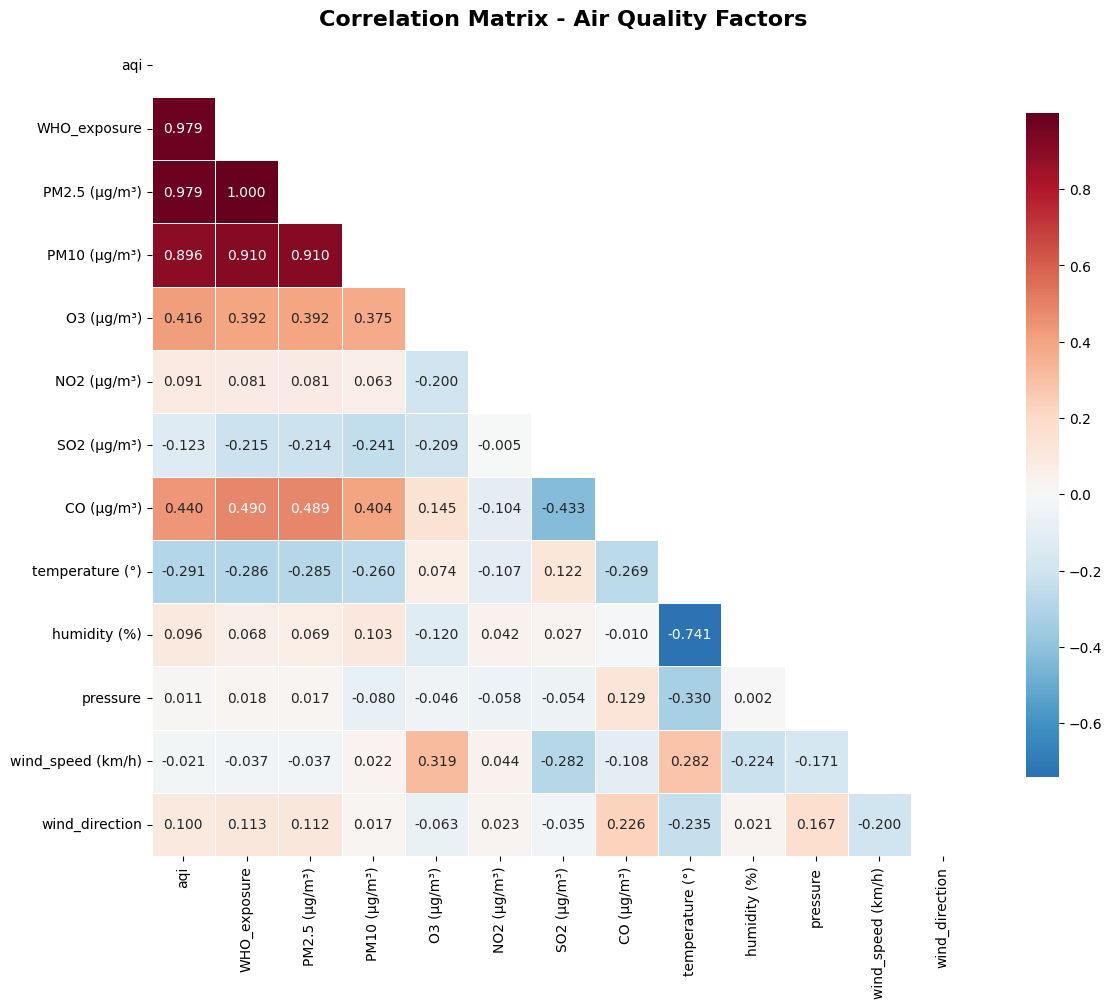

In [30]:
def plot_correlation_matrix():
    """Plot correlation matrix heatmap"""
    
    corr_matrix = correlation_data_clean.corr()
    
    plt.figure(figsize=(12, 10))
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": .8},
                fmt='.3f')
    
    plt.title('Correlation Matrix - Air Quality Factors', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

corr_matrix = plot_correlation_matrix()